In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import dandelion as ddl
sc.logging.print_header()

warnings.filterwarnings('ignore')
os.chdir('/lustre/scratch117/cellgen/team297/kt16/Ziad/scanpy')

scanpy==1.6.0 anndata==0.7.4 umap==0.4.6 numpy==1.18.5 scipy==1.4.1 pandas==1.1.3 scikit-learn==0.23.2 statsmodels==0.12.0 python-igraph==0.7.1 leidenalg==0.8.2


In [2]:
ddl.logging.print_header()

dandelion==0.0.29 pandas==1.1.3 numpy==1.18.5 matplotlib==3.3.2 networkx==2.5 scipy==1.4.1 skbio==0.5.6


In [3]:
rna = sc.read_h5ad('h5ad/adata_soupx_trans_cite_rna.h5ad')
raw = sc.read_h5ad('h5ad/adata_soupx_trans_cite_bgshift_raw.h5ad')

In [4]:
rna = rna[rna.obs['fine_clustering'].isin(['B_naive', 'B_non-switched_memory', 'B_switched_memory','Plasmablast'])].copy()
raw = raw[raw.obs['fine_clustering'].isin(['B_naive', 'B_non-switched_memory', 'B_switched_memory','Plasmablast'])].copy()

### Integrate VDJ using dandelion

In [5]:
# Set up the sample info
sampleInfo = pd.read_csv('../Sample_Key.csv')
sampleInfo['10x_ID'] = ['Sample_Fq'+str(x) for x in sampleInfo['10x_ID']]

In [6]:
sampledict = ddl.utl.dict_from_table(sampleInfo, columns = ('10x_ID', '10x_ID'))

In [7]:
samples = sampleInfo['10x_ID']
df = []
for s in samples:
    df_ = ddl.utl.load_data('../BCR/'+ s + '/dandelion/data/filtered_contig_igblast_gap_genotyped.tsv')
    df.append(df_)
df = df[0].append(df[1:])
df

,sequence_id,sequence,rev_comp,productive,v_call,d_call,j_call,sequence_alignment,germline_alignment,junction,...,c_germline_alignment,c_sequence_start,c_sequence_end,c_score,c_identity,c_support,sample_id,v_call_genotyped,germline_alignment_d_mask,mu_freq
sequence_id,,,,,,,,,,,,,,,,,,,,,
Sample_Fq1_AAACGGGCACCATCCT-1_contig_1,Sample_Fq1_AAACGGGCACCATCCT-1_contig_1,AGGAGTCAGACCCAGTCAGGACACAGCATGGACATGAGGGTCCCCG...,F,T,"IGKV1-12*01,IGKV1-12*02,IGKV1D-12*02",NaN,IGKJ5*01,GACATCCAGATGACCCAGTCTCCATCTTCCGTGTCTGCATCTGTAG...,GACATCCAGATGACCCAGTCTCCATCTTCCGTGTCTGCATCTGTAG...,TGTCAACAGGCTAAAAGTTTCCCGATCACCTTC,...,CGAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATG...,415.0,551.0,254.111,100.0,5.000000e-70,Sample_Fq25,"IGKV1-12*01,IGKV1-12*02,IGKV1D-12*02",GACATCCAGATGACCCAGTCTCCATCTTCCGTGTCTGCATCTGTAG...,0.018692
Sample_Fq1_ACACCGGCATCGTCGG-1_contig_1,Sample_Fq1_ACACCGGCATCGTCGG-1_contig_1,AGCTCTGAGAGAGGAGCCCAGCCCTGGGATTTTCAGGTGTTTTCAT...,F,T,"IGHV3-23*01,IGHV3-23D*01",IGHD6-19*01,IGHJ5*02,GAGGTGCAGTTGTTGGAGTCTGGGGGA...GGCTTGGTACAGCCTG...,GAGGTGCAGCTGTTGGAGTCTGGGGGA...GGCTTGGTACAGCCTG...,TGTGCGAAAGATCCTGTCCCCGATCACAGTGGCTGGAACTGGTTCG...,...,GGGAGTGCATCCGCCCCAACCCTTTTCCCCCTCGTCTCCTGTGAGA...,506.0,577.0,134.079,100.0,7.000000e-34,Sample_Fq25,"IGHV3-23*01,IGHV3-23D*01",GAGGTGCAGCTGTTGGAGTCTGGGGGA...GGCTTGGTACAGCCTG...,0.034884
Sample_Fq1_ACACCGGCATCGTCGG-1_contig_2,Sample_Fq1_ACACCGGCATCGTCGG-1_contig_2,AGAGCTCTGGGGAGGAACTGCTCAGTTAGGACCCAGACGGAACCAT...,F,T,IGKV3-15*01,NaN,IGKJ1*01,GAAATAGTGATGACGCAGTCTCCAGCCACCCTGTCTGTGTCTCCTG...,GAAATAGTGATGACGCAGTCTCCAGCCACCCTGTCTGTGTCTCCAG...,TGTCAGCAGTATAATAACTGGCCTCGGACGTTC,...,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,427.0,562.0,252.265,100.0,2.000000e-69,Sample_Fq25,IGKV3-15*01,GAAATAGTGATGACGCAGTCTCCAGCCACCCTGTCTGTGTCTCCAG...,0.012461
Sample_Fq1_ACGGCCACAGTTAACC-1_contig_1,Sample_Fq1_ACGGCCACAGTTAACC-1_contig_1,AGAGCTCTGGAGAAGAGCTGCTCAGTTAGGACCCAGAGGGAACCAT...,F,T,IGKV3-20*01,NaN,IGKJ1*01,GAAATTGTGTTGACGCAGTCTCCAGGCACCCTGTCTTTGTCTCCAG...,GAAATTGTGTTGACGCAGTCTCCAGGCACCCTGTCTTTGTCTCCAG...,TGTCAGCAGTATGGTAGCTCACCGTGGACGTTC,...,CGAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATG...,429.0,565.0,254.111,100.0,5.000000e-70,Sample_Fq25,IGKV3-20*01,GAAATTGTGTTGACGCAGTCTCCAGGCACCCTGTCTTTGTCTCCAG...,0.000000
Sample_Fq1_ACGGCCACAGTTAACC-1_contig_2,Sample_Fq1_ACGGCCACAGTTAACC-1_contig_2,ACAACCACACCCCTCCTAAGAAGAAGCCCCTAGACCACAGCTCCAC...,F,T,IGHV7-4-1*02,IGHD6-13*01,IGHJ5*02,CAGGTGCAGCTGGTGCAATCTGGGTCT...GAGTTGAAGAAGCCTG...,CAGGTGCAGCTGGTGCAATCTGGGTCT...GAGTTGAAGAAGCCTG...,TGTGCGAGAGAGTATAGCAGCAGCTGGTACGGGGCGTGGGGCTGGT...,...,GCATCCCCGACCAGCCCCAAGGTCTTCCCGCTGAGCCTCTGCAGCA...,479.0,639.0,298.431,100.0,3.000000e-83,Sample_Fq25,IGHV7-4-1*02,CAGGTGCAGCTGGTGCAATCTGGGTCT...GAGTTGAAGAAGCCTG...,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sample_Fq32_TCACGAAGTTTGCATG-1_contig_2,Sample_Fq32_TCACGAAGTTTGCATG-1_contig_2,TCCAGGCCACGACCAGCTGTTTGGATTTTATAAACGGGCCGTTTGC...,F,T,IGKV4-1*01,NaN,IGKJ1*01,GACATCGTGATGACCCAGTCTCCAGACTCCCTGGCTGTGTCTCTGG...,GACATCGTGATGACCCAGTCTCCAGACTCCCTGGCTGTGTCTCTGG...,TGTCAGCAATATTATAGTACTCCTTGGACGTTC,...,CGAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATG...,486.0,622.0,254.111,100.0,6.000000e-70,Sample_Fq8,IGKV4-1*01,GACATCGTGATGACCCAGTCTCCAGACTCCCTGGCTGTGTCTCTGG...,0.000000
Sample_Fq32_TCACGAAGTTTGCATG-1_contig_3,Sample_Fq32_TCACGAAGTTTGCATG-1_contig_3,CCAGGGAAGGGGCTGGAGTGGGTTGGCCGTATTAAAAGCAAAACTG...,F,T,"IGHV3-15*01,IGHV3-15*02","IGHD3-16*01,IGHD3-16*02",IGHJ3*02,.................................................,TGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTTGGCCGTA...,TGTACCACAAAGTATTATGATTACGTTTGGGGGAGTTTTGCTTTTG...,...,GCACCCACCAAGGCTCCGGATGTGTTCCCCATCATATCAGGGTGCA...,256.0,358.0,191.325,100.0,3.000000e-51,Sample_Fq8,"IGHV3-15*01,IGHV3-15*02",GAGGTGCAGCTGGTGGAGTCTGGGGGA...GGCTTGGTAAAGCCTG...,0.000000
Sample_Fq32_TGCCCATAGAGCTATA-1_contig_1,Sample_Fq32_TGCCCATAGAGCTATA-1_contig_1,AGGAATCAGACCCAGTCAGGACACAGCATGGACATGAGAGTCCCCG...,F,T,IGKV1-16*01,NaN,IGK

In [8]:
vdj, rna = ddl.pp.filter_bcr(df, rna, filter_rna = False)
vdj

Scanning for poor quality/ambiguous contigs with 63 cpus


Annotating in anndata obs slot : 100%|██████████| 10548/10548 [00:00<00:00, 18974.49it/s]


Finishing up filtering
Initializing Dandelion object


Dandelion class object with n_obs = 7561 and n_contigs = 15047
    data: 'sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call', 'j_call', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar', 'locus', 'stop_codon', 'vj_in_frame', 'sequence_alignment_aa', 'germline_alignment_aa', 'v_alignment_start', 'v_alignment_end', 'd_alignment_start', 'd_alignment_end', 'j_alignment_start', 'j_alignment_end', 'v_sequence_alignment', 'v_sequence_alignment_aa', 'v_germline_alignment', 'v_germline_alignment_aa', 'd_sequence_alignment', 'd_sequence_alignment_aa', 'd_germline_alignment', 'd_germline_alignment_aa', 'j_sequence_alignment', 'j_sequence_alignment_aa', 'j_germline_alignment', 'j_germline_alignment_aa', 'fwr1', 'fwr1_aa', 'cdr1', 'cdr1_aa', 'fwr2', 'fwr2_aa', 'cdr2', 'cdr2_aa', 'fwr3', 'fwr3_aa', 'fwr4', 'fwr4_aa', 'cdr3', 'cdr3_aa', 'junction_length', 'junction_aa_length', 'v_score', 'd_score', 'j_score', 'v_support', 'd_sup

In [9]:
ddl.tl.find_clones(vdj)

Finding clones based on heavy chains : 100%|██████████| 353/353 [00:00<00:00, 1179.36it/s]
Refining clone assignment based on light chain pairing : 100%|██████████| 6987/6987 [00:11<00:00, 593.82it/s] 


In [10]:
ddl.tl.clone_size(vdj)

In [11]:
ddl.tl.clone_size(vdj, max_size=3)

In [12]:
ddl.tl.generate_network(vdj)

Linking edges : 100%|██████████| 7239/7239 [00:53<00:00, 134.79it/s]


generating network layout


In [13]:
ddl.tl.transfer(rna, vdj)

converting matrices
Updating anndata slots


In [14]:
# Recluster for Aki

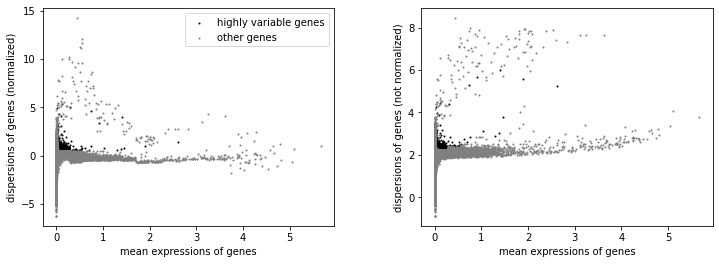

In [15]:
# Identify highly-variable genes
rna = rna.raw.to_adata()
sc.pp.highly_variable_genes(rna, min_mean = 0.0125, max_mean = 3, min_disp = 0.5)
## remove TRBV/TRAV and IGHV/IGLV/IGKV from the highly variable genes
import re
for i in rna.var.index:
    if re.search('^IG[HKL][VDJC]', i):
        rna.var.at[i, 'highly_variable'] = False
sc.pl.highly_variable_genes(rna)
# stash the normalized data in raw
rna.raw = rna
# filter to only highly variable
rna = rna[:, rna.var['highly_variable']]

In [16]:
import multiprocessing
# regress and scale for PCA
sc.pp.regress_out(rna, ['total_counts', 'pct_counts_mt'], n_jobs = multiprocessing.cpu_count()-1)
sc.pp.scale(rna, max_value = 10)
sc.tl.pca(rna, svd_solver = 'arpack')

Trying to set attribute `.obs` of view, copying.
... storing 'clone_id' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'sample_id' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'locus_heavy' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'locus_light' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'productive_heavy' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'productive_light' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'v_call_genotyped_heavy' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'v_call_genotyped_light' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'j_call_heavy' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'j_call_light' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'c_call_he

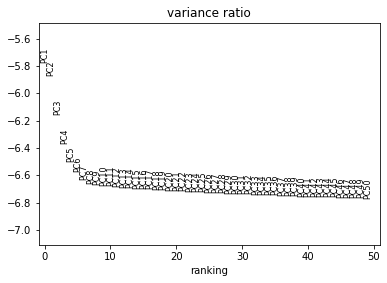

In [17]:
sc.pl.pca_variance_ratio(rna, n_pcs=50, log=True) 

In [18]:
# run harmony. compute the neighborhood graph.
sc.external.pp.harmony_integrate(rna, key='study_id')
sc.pp.neighbors(rna, use_rep = 'X_pca_harmony')

2021-02-11 11:53:52,787 - harmonypy - INFO - Iteration 1 of 10
2021-02-11 11:53:56,090 - harmonypy - INFO - Iteration 2 of 10
2021-02-11 11:53:59,255 - harmonypy - INFO - Iteration 3 of 10
2021-02-11 11:54:01,340 - harmonypy - INFO - Iteration 4 of 10
2021-02-11 11:54:03,014 - harmonypy - INFO - Iteration 5 of 10
2021-02-11 11:54:04,613 - harmonypy - INFO - Iteration 6 of 10
2021-02-11 11:54:06,104 - harmonypy - INFO - Iteration 7 of 10
2021-02-11 11:54:07,587 - harmonypy - INFO - Iteration 8 of 10
2021-02-11 11:54:09,080 - harmonypy - INFO - Iteration 9 of 10
2021-02-11 11:54:10,570 - harmonypy - INFO - Converged after 9 iterations


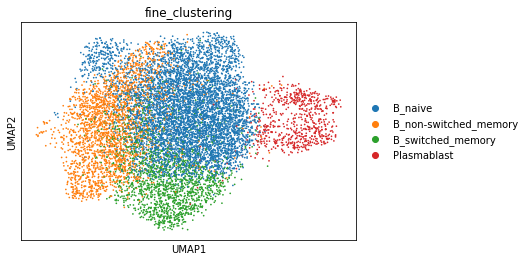

In [19]:
sc.tl.umap(rna)
sc.pl.umap(rna, color = 'fine_clustering')

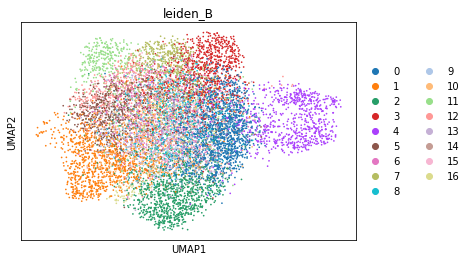

In [20]:
sc.tl.leiden(rna, key_added = 'leiden_B')
sc.pl.umap(rna, color = 'leiden_B')

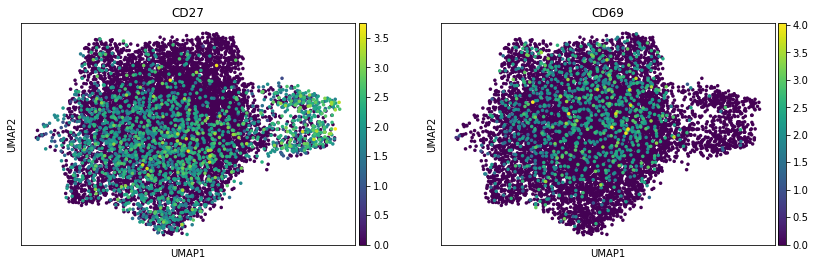

In [21]:
sc.pl.umap(rna, color = ['CD27', 'CD69'], size = 50)

In [22]:
raw.obs = rna.obs.copy()
raw.uns = rna.uns.copy()
raw.obsm = rna.obsm.copy()
raw.obsp = rna.obsp.copy()

In [23]:
rna

AnnData object with n_obs × n_vars = 10548 × 1877
    obs: 'sampleid', 'sampleid_study', 'timepoint', 'treatment', 'study_id', 'scrublet_score', 'n_genes', 'percent_mito', 'n_counts', 'is_doublet', 'filter_rna', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'initial_clustering', 'fine_clustering', 'treatment_timepoint', 'sex', 'age', 'peak_trop', 'BNP', 'on_treatment_CRP', 'AEs', 'treatment_group_1', 'treatment_group_2', 'Lymph', 'CD4', 'CD8', 'Treg', 'has_bcr', 'filter_bcr_quality', 'filter_bcr_heavy', 'filter_bcr_light', 'bcr_QC_pass', 'filter_bcr', 'clone_id', 'clone_id_by_size', 'sample_id', 'locus_heavy', 'locus_light', 'productive_heavy', 'productive_light', 'v_call_genotyped_heavy', 'v_call_genotyped_light', 'j_call_heavy', 'j_call_light', 'c_call_heavy', 'c_call_light', 'umi_count_heavy_0', 'umi_count_heavy_1', 'umi_count_heavy_2', 'umi_count_heavy_3', 'umi_count_light_0', 'umi_count_light_1', 'umi_count_light_2', 'umi_count_light_3

In [24]:
raw

AnnData object with n_obs × n_vars = 10548 × 33548
    obs: 'sampleid', 'sampleid_study', 'timepoint', 'treatment', 'study_id', 'scrublet_score', 'n_genes', 'percent_mito', 'n_counts', 'is_doublet', 'filter_rna', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'initial_clustering', 'fine_clustering', 'treatment_timepoint', 'sex', 'age', 'peak_trop', 'BNP', 'on_treatment_CRP', 'AEs', 'treatment_group_1', 'treatment_group_2', 'Lymph', 'CD4', 'CD8', 'Treg', 'has_bcr', 'filter_bcr_quality', 'filter_bcr_heavy', 'filter_bcr_light', 'bcr_QC_pass', 'filter_bcr', 'clone_id', 'clone_id_by_size', 'sample_id', 'locus_heavy', 'locus_light', 'productive_heavy', 'productive_light', 'v_call_genotyped_heavy', 'v_call_genotyped_light', 'j_call_heavy', 'j_call_light', 'c_call_heavy', 'c_call_light', 'umi_count_heavy_0', 'umi_count_heavy_1', 'umi_count_heavy_2', 'umi_count_heavy_3', 'umi_count_light_0', 'umi_count_light_1', 'umi_count_light_2', 'umi_count_light_

In [25]:
raw.raw = raw

In [26]:
sc.pp.normalize_total(raw, target_sum=1e4)
sc.pp.log1p(raw)

In [27]:
ddl.tl.transfer(raw, vdj)

converting matrices
Updating anndata slots


In [28]:
raw

AnnData object with n_obs × n_vars = 10548 × 33548
    obs: 'sampleid', 'sampleid_study', 'timepoint', 'treatment', 'study_id', 'scrublet_score', 'n_genes', 'percent_mito', 'n_counts', 'is_doublet', 'filter_rna', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'initial_clustering', 'fine_clustering', 'treatment_timepoint', 'sex', 'age', 'peak_trop', 'BNP', 'on_treatment_CRP', 'AEs', 'treatment_group_1', 'treatment_group_2', 'Lymph', 'CD4', 'CD8', 'Treg', 'has_bcr', 'filter_bcr_quality', 'filter_bcr_heavy', 'filter_bcr_light', 'bcr_QC_pass', 'filter_bcr', 'clone_id', 'clone_id_by_size', 'sample_id', 'locus_heavy', 'locus_light', 'productive_heavy', 'productive_light', 'v_call_genotyped_heavy', 'v_call_genotyped_light', 'j_call_heavy', 'j_call_light', 'c_call_heavy', 'c_call_light', 'umi_count_heavy_0', 'umi_count_heavy_1', 'umi_count_heavy_2', 'umi_count_heavy_3', 'umi_count_light_0', 'umi_count_light_1', 'umi_count_light_2', 'umi_count_light_

In [29]:
raw.write('h5ad/Bcells_100221.h5ad', compression = 'gzip')

In [30]:
raw.obs

,sampleid,sampleid_study,timepoint,treatment,study_id,scrublet_score,n_genes,percent_mito,n_counts,is_doublet,...,status_summary,productive,productive_summary,isotype,isotype_summary,vdj_status_detail,vdj_status,clone_id_size,clone_id_size_max_3,leiden_B
Sample_Fq1_AACTCCCAGTACGACG,Sample_Fq2,L6010T2,post,Saline,L6010,0.053861,706,3.220730,1777.167483,False,...,No_BCR,No_BCR,No_BCR,No_BCR,No_BCR,No_BCR,No_BCR,NaN,NaN,8
Sample_Fq1_AAGGAGCGTGTCCTCT,Sample_Fq2,L6010T2,post,Saline,L6010,0.055118,614,1.914605,1439.984258,False,...,IGH + IGK,T + T,T + T,IgM,IgM,Single + Single,Single,1.0,1,15
Sample_Fq1_AATCCAGCACCAGGTC,Sample_Fq2,L6010T2,post,Saline,L6010,0.028000,990,2.760000,3219.388714,False,...,IGH + IGK,T + T,T + T,IgM,IgM,Single + Multi_light_v,Single,1.0,1,4
Sample_Fq1_AATCCAGGTCGGATCC,Sample_Fq2,L6010T2,post,Saline,L6010,0.030272,994,7.225631,2796.707745,False,...,No_BCR,No_BCR,No_BCR,No_BCR,No_BCR,No_BCR,No_BCR,NaN,NaN,16
Sample_Fq1_ACAGCTACAGGCTGAA,Sample_Fq2,L6010T2,post,Saline,L6010,0.044723,972,2.174665,2681.497028,False,...,No_BCR,No_BCR,No_BCR,No_BCR,No_BCR,No_BCR,No_BCR,NaN,NaN,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sample_Fq32_TTAGGCATCATACGGT,Sample_Fq32,L7003T7,post,2.5MIU,L7003,0.093248,536,8.025645,1042.916962,False,...,IGH + IGK,T + T,T + T,IgM,IgM,Single + Single,Single,1.0,1,8
Sample_Fq32_TTCCCAGTCATGTCCC,Sample_Fq32,L7003T7,post,2.5MIU,L7003,0.057283,610,7.274370,1540.755722,False,...,IGH + IGK,T + T,T + T,IgM,IgM,Multi_heavy_v + Multi_light_v,Multi,1.0,1,16
Sample_Fq32_TTGCCGTCAGTACACT,Sample_Fq32,L7003T7,post,2.5MIU,L7003,0.033010,782,4.001608,1888.792406,False,...,IGH + IGK,T|F + T,Multi,IgM|IgD,Multi,Multi_heavy_v + Single,Single,1.0,1,3
Sample_Fq32_TTGCGTCCAAGGGTCA,Sample_Fq32,L7003T7,post,2.5MIU,L7003,0.102041,539,3.466898,1086.907490,False,...,IGH + IGK,T + T,T + T,IgM,IgM,Single + Multi_light_v,Single,1.0,1,3


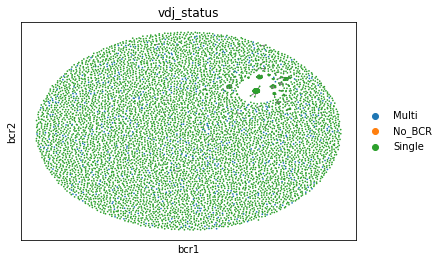

In [31]:
ddl.pl.clone_network(raw, color = 'vdj_status', edges_width = 1)